# Merging Annotations


##  1. PLoS Methods

In [98]:
import os
from os import listdir
from os.path import isfile, join


# we are interested only on annotations set of:  (software_usage and purpose annotations)

interest_list = ['Application_Usage','ProgrammingEnvironment_Usage',
                 'PlugIn_Usage','OperatingSystem_Usage', 'Purpose_Analysis',
                 'Purpose_Modelling', 'Purpose_Stimulation', 
                 'Purpose_DataCollection', 'Purpose_DataPreProcss', 
                 'Purpose_Simulation', 'Purpose_Visualization', 'Purpose_Programming', 
                 'Application_Creation', 'PlugIn_Creation',
                 'Application_Deposition', 'PlugIn_Deposition', 'SoftwareCoreference_Deposition',
                 'Application_Mention','ProgrammingEnvironment_Mention','OperatingSystem_Mention','PlugIn_Mention',
                 'Version','Developer', 'URL', 'License','Citation', 'Abbreviation', 'AlternativeName', 'Release', 'Extension']

# file path
path = 'SoMeSci/PLoS_methods/'

# gather list of .ann PLoS_methods files ---------------------------------------------
PLOS_filesList = []

# iterating over all files in the dir
for file_name in os.listdir(path):
    
    # if the file is .ann
    if file_name.endswith('.ann'):
        PLOS_filesList.append(file_name)
    else:
        continue

PLOS_filesList.sort() 

print('.ann PLosMethods file count : ', len(PLOS_filesList), '\n')
print('Firts 5 files: ',PLOS_filesList[:5])

# gather list of .ann PLoS_methods files ---------------------------------------------

.ann PLosMethods file count :  480 

Firts 5 files:  ['PMC1088287.ann', 'PMC1657052.ann', 'PMC1831734.ann', 'PMC1880851.ann', 'PMC1939732.ann']


In [99]:
#interest_list

In [100]:
"""

There are different kinds of annotations in the .ann file. 
-----------------------------------------------------------

TYPES OF ANNOTATIONS

T - text bound annotations
R - relations
E - event
A - attribute
M - modification
N - Normalization 
-----------------------------------------------------------

We are interested in "text bound annotations only" that indicate software_usage and software_purpose.

Therefore get a list of all annotations in the .ann file iff:
        
        1. annotations are text bound ( start with T) & 
        2. annotations indicate software_usage or software_purpose
        
the result is then stored in a dictionary 

where,

    key of dict == name of the file 
    Value of dict == list of list of annotation lines in the file
"""

# stores ORIGIAL list of annotations in a file (BEFORE MERGING)
fileAn_dict = {}

# store all annotations in the file ( format: list-of-list)
annotation_filelist = []

# loop over each file 
for indx, file in enumerate(PLOS_filesList[:]):
    
    # path to each file
    file_path = path + file
    
    with open(file_path, "r") as a_file:
        
        # stores annotation line 
        annotation_line = []
        
        
        # check if the annotation is what we want (usage, purpose, starts with T )
        for line in a_file:
            
            # grab the type of annotation
            annotataion = line.split()[1:2][0]
            
            
            if (line.startswith('T') & (annotataion in interest_list)):

                if ( line.split()[2:4] ) not in annotation_line: 
                    
                    #print(line.split()[2:4])
                    
                    annotation_line.append(line.split())
                    #print(indx, file, line.split())

                else:
                    pass
        
        fileAn_dict[file] = annotation_line     

In [101]:
#fileAn_dict

In [102]:
print('The size of the mapping dictionary: ', len(fileAn_dict))
print('ALl files included!')

The size of the mapping dictionary:  480
ALl files included!


## Merging Annotations

In [103]:
'''

each annotation line has a form of:

     [Tx | Annotation | START | STOP | nameOfSoftware]
     
     example: 'T2', 'Application_Usage', '13536', '13539', 'SAS'

mergeList() merges two lines of annotations if their start is the same

'''

def mergeList(list_1, list_2):
    
    #stores merged annotations
    result_list = []
    
    '''
    
     list_1[2:3] is START number 
     merge two annotations if their start number is the same
    
    '''
    
    for x, y in [(x,y) for x in list_1[2:3] for y in list_2[2:3]]:
        
        
        
        # if the starting positions are the same x=y
        if( x == y):
            
            #print(x)
            
            #get id of the firt annotation 
            result_list.append(list_1[0])
            
            #merge annotations by :
            result_list.append(list_1[1]+':'+list_2[1])
            
            # start number
            result_list.append(list_1[2])
            
            #end number
            result_list.append(list_1[3])
            
            # get name of the software
            software_name_splitted = list_1[4:]
            software_name_joined = ' '.join(software_name_splitted)
            
            result_list.append(software_name_joined)
    
            
        else:
            pass
    return result_list

In [104]:
# stores MERGED LIST of annotations in each file
merged_dict = {}

#stores list of list of all annotations
all_annotations_list = []


# for each file in the dict
for key in list(fileAn_dict)[:]:
    
    # stores list of merged annotations
    merged_annotationlist_perfile = []
    
    #print(key)
    """
    compare all annotations to each other and grab those that share the same "start number"
    
    """
    
    lookup_list1 = []
    for ls1 in fileAn_dict.get(key):
            
            
            lookup_list2 = []
            for ls2 in fileAn_dict.get(key):
                
                
                # compare each annotation with another but not to itself
                if (ls1 != ls2) :
                    
                    
                    # merge annotations
                    r = mergeList(ls1,ls2)
                    
                    # if the 
                    if len(r) !=0 :
                        
                        #print(ls1[0],ls2[0], ls1[2:4], ls2[2:4])
                        
         
                        if (r[2] not in lookup_list1 ) | (r[3] not in lookup_list1 ):
                            
                            merged_annotationlist_perfile.append(r) 
                            all_annotations_list.append(r)
                            
                            lookup_list2.extend(r[2:4])
                            
                        else:
                            pass
            # save already merged list on the lookup list            
            lookup_list1.extend(lookup_list2)  
            #break
                        
                        
    merged_dict[key] = merged_annotationlist_perfile

In [105]:
for file in list(merged_dict)[:]:
    print('file:', file, '|',merged_dict.get(file), '\n\n')

file: PMC1088287.ann | [] 


file: PMC1657052.ann | [['T1', 'Application_Usage:Purpose_Modelling', '3670', '3681', 'DS modeling'], ['T2', 'Application_Usage:Purpose_DataCollection', '5677', '5683', 'pCLAMP'], ['T3', 'Application_Usage:Purpose_Analysis', '1203', '1211', 'ENSEMBLE']] 


file: PMC1831734.ann | [['T1', 'Application_Usage:Purpose_DataCollection', '1447', '1450', 'RIU'], ['T2', 'Application_Usage:Purpose_Analysis', '8512', '8517', 'Stata']] 


file: PMC1880851.ann | [] 


file: PMC1939732.ann | [['T1', 'Application_Usage:Purpose_Modelling', '1984', '1990', 'AsReml'], ['T2', 'ProgrammingEnvironment_Usage:Purpose_Stimulation', '7238', '7244', 'MATLAB'], ['T3', 'Application_Usage:Purpose_Analysis', '7300', '7306', 'AsReml']] 


file: PMC2002515.ann | [['T1', 'Application_Usage:Purpose_Analysis', '12585', '12588', 'SAS'], ['T2', 'Application_Usage:Purpose_Analysis', '13536', '13539', 'SAS']] 


file: PMC2134966.ann | [['T1', 'Application_Usage:Purpose_Visualization', '874', '886

file: PMC5102347.ann | [['T1', 'Application_Usage:Purpose_Analysis', '10165', '10170', 'Stata']] 


file: PMC5104352.ann | [['T1', 'Application_Usage:Purpose_DataCollection', '372', '384', 'Google Earth'], ['T2', 'Application_Usage:Purpose_DataCollection', '667', '679', 'Google Earth'], ['T3', 'Application_Usage:Purpose_DataPreProcss', '1169', '1179', 'SDMtoolbox'], ['T4', 'Application_Usage:Purpose_Programming', '2772', '2778', 'MaxEnt'], ['T8', 'Application_Usage:Purpose_Analysis', '4472', '4482', 'SDMtoolbox'], ['T15', 'Application_Usage:Purpose_Analysis', '7982', '7988', 'MaxEnt'], ['T16', 'Application_Usage:Purpose_Analysis', '8873', '8881', 'ENMtools']] 


file: PMC5127506.ann | [['T1', 'Application_Usage:Purpose_DataCollection', '7684', '7692', 'iDataFax'], ['T2', 'Application_Usage:Purpose_Analysis', '7747', '7790', 'Statistical Package for the Social Sciences']] 


file: PMC5156411.ann | [['T1', 'Application_Usage:Purpose_Analysis', '12749', '12754', 'Prism']] 


file: PMC5158

## PLoS:  writing merged annotations back to *.ann files

In [106]:
# fileAn_dict -> contains file name -vs- list of  (original) annotations 


print("# of files with ORIGINAL annotations:", len(fileAn_dict))

print("# of files with MERGED annotations:", len(merged_dict))

# merged_dict -> contains file name -vs- list of  (merged) annotations 

# of files with ORIGINAL annotations: 480
# of files with MERGED annotations: 480


In [107]:
for file in list(merged_dict):
    
    path2 = 'SoMeSci/PLoS_methodsClean/'
    file_path = path2 + file
    
    #print(file_path)
    
    with open(file_path, "w") as f1:
        
        
        for line in merged_dict.get(file):
            
            txt = '\t'.join(line)
            
            #print('Writing To ->',file, '<-',txt)
            
            #write merged annotation to the file 
            f1.write(txt+ '\n')
            
        #print("-------------------------------------------------")

### Store the merged annotation lists Into a Data Frame

In [108]:
import pandas as pd

df_PLOS = pd.DataFrame(columns=['code', 'annotation','start','stop','software'], data=all_annotations_list)
#df_PLOS

### Save the df_PLOS image

In [109]:
# get head and tail of the df
PLOS_head = df_PLOS.head(10)
PLOS_tail = df_PLOS.tail(10)


import dataframe_image as dfi


PLOS_head = PLOS_head.style.background_gradient()
dfi.export(PLOS_head,"PLOS_head_.png")

PLOS_tail = PLOS_tail.style.background_gradient()
dfi.export(PLOS_tail,"PLOS_tail_.png")

df_PLOS.to_csv(r'PLOS_.csv', index = False)

[0111/014701.537043:ERROR:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0111/014701.650382:INFO:headless_shell.cc(653)] Written to file /tmp/tmpeqpjs2xt/temp.png.
[0111/014701.779572:ERROR:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0111/014701.874401:INFO:headless_shell.cc(653)] Written to file /tmp/tmpaygbq251/temp.png.


## 2. PubMed Full Text

In [110]:
import os
from os import listdir
from os.path import isfile, join


interest_list = ['Application_Usage','ProgrammingEnvironment_Usage','PlugIn_Usage','OperatingSystem_Usage', 'Purpose_Analysis','Purpose_Modelling', 'Purpose_Stimulation', 
                 'Purpose_DataCollection', 'Purpose_DataPreProcss', 'Purpose_Simulation', 'Purpose_Visualization', 
                 'Purpose_Programming', 'Application_Creation', 'PlugIn_Creation',
                 'Application_Deposition', 'PlugIn_Deposition', 'SoftwareCoreference_Deposition',
                 'Application_Mention','ProgrammingEnvironment_Mention','OperatingSystem_Mention','PlugIn_Mention',
                 'Version','Developer', 'URL', 'License','Citation', 'Abbreviation', 'AlternativeName', 'Release', 'Extension']


#  1. get a list of PubMed file names---------------------------------------------------------------------

mypath = "SoMeSci/Pubmed_fulltext/"

Pubmed_filesList = []
  
# iterating over all files in the dir
for file_name in os.listdir(mypath):
    
    # if the file is .ann
    if file_name.endswith('.ann'):
        Pubmed_filesList.append(file_name)
    else:
        continue

Pubmed_filesList.sort() 

#print('First 5 files: ',Pubmed_filesList[:5])


# 2. get file name and list of annotations into a dict-------------------------------------------------------


# stores ORIGIAL list of annotations in a file (BEFORE MERGING)
fileAn_dict2 = {}

# store all annotations in the file ( format: list-of-list)
annotation_filelist2 = []

# loop over each file 
for indx, file in enumerate(Pubmed_filesList[:]):
    
    # path to each file
    file_path = mypath + file
    
    with open(file_path, "r") as a_file:
        
        # stores annotation line 
        annotation_line2 = []
        
        
        # check if the annotation is what we want (usage, purpose, starts with T )
        for line in a_file:
            
            # grab the type of annotation
            annotataion = line.split()[1:2][0]
            
            if (line.startswith('T') & (annotataion in interest_list)):

                if ( line.split()[2:4] ) not in annotation_line2: 
                    
                    annotation_line2.append(line.split())
                    #print(indx, file, line.split())

                else:
                    pass
        
        fileAn_dict2[file] = annotation_line2     
        
# 3. Merge annotations -----------------------------------------------------------------------


#store all merged annotations with a file name 
# stores MERGED LIST of annotations in each file
merged_dict2 = {}

#stores list of list of all annotations
all_annotations_list2 = []


# for each file in the dict
for key in list(fileAn_dict2):
    
    # stores list of merged annotations
    merged_annotationlist_perfile2 = []
    #print(key)
    """
    compare all annotations to each other and grab those that share the same "start number"
    
    """
    
    lookup_list1 = []
    for ls1 in fileAn_dict2.get(key):
            
            
            lookup_list2 = []
            for ls2 in fileAn_dict2.get(key):
                
                
                # compare each annotation with another but not to itself
                if (ls1 != ls2) :
                    
                    
                    # merge annotations
                    r = mergeList(ls1,ls2)
                    
                    
                    
                    # if the 
                    if len(r) !=0 :
                        #print(ls1[0],ls2[0], ls1[2:4], ls2[2:4])
         
                        if (r[2] not in lookup_list1 ) | (r[3] not in lookup_list1 ):
                            
                            merged_annotationlist_perfile2.append(r) 
                            all_annotations_list2.append(r)
                            
                            
                            lookup_list2.extend(r[2:4])
                            
                        else:
                            pass
            # save already merged list on the lookup list            
            lookup_list1.extend(lookup_list2)  
            #break
                        
                        
    merged_dict2[key] = merged_annotationlist_perfile2

In [111]:
for file in list(merged_dict2)[:]:
    print('file name:', file, '|  ',merged_dict2.get(file), '\n\n')

file name: PMC1240430.ann |   [] 


file name: PMC2790482.ann |   [['T1', 'Application_Usage:Purpose_Analysis', '15525', '15534', 'SigmaStat'], ['T5', 'Application_Usage:Purpose_DataCollection', '23622', '23636', 'Image-Pro Plus'], ['T10', 'Application_Usage:Purpose_DataCollection', '23735', '23744', 'Scope-Pro'], ['T14', 'Application_Usage:Purpose_DataPreProcss', '24827', '24830', 'IPP'], ['T15', 'Application_Usage:Purpose_Visualization', '24913', '24922', 'Photoshop'], ['T20', 'Application_Usage:Purpose_DataPreProcss', '25136', '25139', 'IPP'], ['T21', 'Application_Usage:Purpose_DataPreProcss', '25842', '25854', 'Office Excel'], ['T25', 'Application_Usage:Purpose_Visualization', '25983', '25992', 'SigmaPlot'], ['T29', 'Application_Usage:Purpose_Analysis', '26915', '26924', 'Photoshop'], ['T30', 'Application_Usage:Purpose_Analysis', '26968', '26971', 'IPP'], ['T31', 'Application_Usage:Purpose_Analysis', '27608', '27616', 'Satistix']] 


file name: PMC2936424.ann |   [['T1', 'Applicati

In [112]:
print('size of merged annotatioon list: ', len(all_annotations_list2), '\n')

print('merged annotation list overview:')
all_annotations_list2[:1]

size of merged annotatioon list:  318 

merged annotation list overview:


[['T1', 'Application_Usage:Purpose_Analysis', '15525', '15534', 'SigmaStat']]

## PubMed:  writing merged annotations back to *.ann files

In [113]:
# fileAn_dict -> contains file name -vs- list of  (original) annotations 


print("# of files with ORIGINAL annotations:", len(fileAn_dict2))

print("# of files with MERGED annotations:", len(merged_dict2))

# merged_dict -> contains file name -vs- list of  (merged) annotations 

# of files with ORIGINAL annotations: 100
# of files with MERGED annotations: 100


In [114]:
for file in list(merged_dict2):
    
    path2 = 'SoMeSci/Pubmed_fulltext_Clean/'
    file_path = path2 + file
    
    #print(file_path)
    
    with open(file_path, "w") as f1:
        
        
        for line in merged_dict2.get(file):
            
            txt = '\t'.join(line)
            
            print('Writing To ->',file, '<-',txt)
            
            #write merged annotation to the file 
            #f1.write(txt+ '\n')
            
        #print("-------------------------------------------------")

Writing To -> PMC2790482.ann <- T1	Application_Usage:Purpose_Analysis	15525	15534	SigmaStat
Writing To -> PMC2790482.ann <- T5	Application_Usage:Purpose_DataCollection	23622	23636	Image-Pro Plus
Writing To -> PMC2790482.ann <- T10	Application_Usage:Purpose_DataCollection	23735	23744	Scope-Pro
Writing To -> PMC2790482.ann <- T14	Application_Usage:Purpose_DataPreProcss	24827	24830	IPP
Writing To -> PMC2790482.ann <- T15	Application_Usage:Purpose_Visualization	24913	24922	Photoshop
Writing To -> PMC2790482.ann <- T20	Application_Usage:Purpose_DataPreProcss	25136	25139	IPP
Writing To -> PMC2790482.ann <- T21	Application_Usage:Purpose_DataPreProcss	25842	25854	Office Excel
Writing To -> PMC2790482.ann <- T25	Application_Usage:Purpose_Visualization	25983	25992	SigmaPlot
Writing To -> PMC2790482.ann <- T29	Application_Usage:Purpose_Analysis	26915	26924	Photoshop
Writing To -> PMC2790482.ann <- T30	Application_Usage:Purpose_Analysis	26968	26971	IPP
Writing To -> PMC2790482.ann <- T31	Applicati

### Store the merged annotation lists Into a Data Frame

In [115]:
import pandas as pd

PubMed = pd.DataFrame(columns=['code', 'annotation','start','stop','software'], data=all_annotations_list2)
PubMed

,code,annotation,start,stop,software
0,T1,Application_Usage:Purpose_Analysis,15525,15534,SigmaStat
1,T5,Application_Usage:Purpose_DataCollection,23622,23636,Image-Pro Plus
2,T10,Application_Usage:Purpose_DataCollection,23735,23744,Scope-Pro
3,T14,Application_Usage:Purpose_DataPreProcss,24827,24830,IPP
4,T15,Application_Usage:Purpose_Visualization,24913,24922,Photoshop
...,...,...,...,...,...
313,T1,ProgrammingEnvironment_Usage:Purpose_Analysis,12455,12456,R
314,T3,PlugIn_Usage:Purpose_Analysis,12485,12501,OptimalCutpoints
315,T4,Application_Usage:Purpose_Modelling,11761,11766,Blast
316,T1,Application_Usage:Purpose_DataPreProcss,11418,11429,Trimmomatic


In [116]:
gkk = PubMed.annotation.value_counts()
#gkk

In [117]:
r = PubMed.software.value_counts()
#r

In [118]:
z = PubMed.groupby(['software','annotation']).size().reset_index(name='Count')
z

,software,annotation,Count
0,3dClustsim,PlugIn_Usage:Purpose_Analysis,1
1,3dDeconvolve,PlugIn_Usage:Purpose_Modelling,1
2,3dDetrend,PlugIn_Usage:Purpose_Analysis,1
3,3dFWHMx,PlugIn_Usage:Purpose_Analysis,1
4,3dmaskave,PlugIn_Usage:Purpose_DataCollection,2
...,...,...,...
229,skewer,Application_Usage:Purpose_DataPreProcss,1
230,survival,PlugIn_Usage:Purpose_Analysis,1
231,survminer,PlugIn_Usage:Purpose_Analysis,1
232,tximport,PlugIn_Usage:Purpose_Analysis,1


In [119]:
list_softwareName_Type_Purpose = []

for index, row in z.iterrows():
    
    
    
    softwareName = row['software']
    
    if softwareName == "Trim Galore":
        
        print(row)
        
        softwareType_Purpose = row['annotation']
        softwareCount = row['Count']

        swType = softwareType_Purpose.split(':')[0].split('_')[0]
        swPurp = softwareType_Purpose.split(':')[1].split('_')[1]

        lst_ = []

        lst_.append(softwareName)
        lst_.append(swType)
        lst_.append(swPurp)
        lst_.append(softwareCount)

        list_softwareName_Type_Purpose.append(lst_)

        #print(f"{softwareName:{30}}|{swType:{25}}|{swPurp:{25}}|{softwareCount:{25}}")

software                                  Trim Galore
annotation    Application_Usage:Purpose_DataPreProcss
Count                                               1
Name: 210, dtype: object


In [120]:
#list_softwareName_Type_Purpose

In [121]:
import pandas as pd

PubMed_swName_Type_Purpose = pd.DataFrame(columns=['Sw_Name', 'Type','Purpose','count'], data=list_softwareName_Type_Purpose)
PubMed_swName_Type_Purpose

,Sw_Name,Type,Purpose,count
0,Trim Galore,Application,DataPreProcss,1


https://coderedirect.com/questions/323797/how-can-i-merge-rows-by-same-value-in-a-column-in-pandas-with-aggregation-func

https://stackoverflow.com/questions/46636080/merge-rows-within-a-group-together

### Save the df image

In [122]:
import dataframe_image as dfi

PubMed_head = PubMed.head(10)
PubMed_tail = PubMed.tail(10)

# save image of head
PubMed_head = PubMed_head.style.background_gradient()
dfi.export(PubMed_head,"PubMed_head_.png")

# save image of tail
PubMed_tail = PubMed_tail.style.background_gradient()
dfi.export(PubMed_tail,"PubMed_tail_.png")


PubMed.to_csv(r'PubMed_.csv', index = False)

[0111/014702.230218:ERROR:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0111/014702.353764:INFO:headless_shell.cc(653)] Written to file /tmp/tmpkeh3cvhu/temp.png.
[0111/014702.477596:ERROR:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0111/014702.602958:INFO:headless_shell.cc(653)] Written to file /tmp/tmpwbq0oufc/temp.png.


## 3. Merging PLOS and PubMed

In [123]:
#df_PLOS

In [124]:
#PubMed

In [125]:
# merge the two dfs

frames = [df_PLOS,PubMed]
PubMed_PLoS = pd.concat(frames)

# reset index
PubMed_PLoS = PubMed_PLoS.reset_index(drop=True)
#PubMed_PLoS

In [126]:
# EXPORT RESULTS


# save image of tail
PubMed_PLoS_head = PubMed_PLoS.head(10)
PubMed_PLoS_tail = PubMed_PLoS.tail(10)

PubMed_PLoS_head = PubMed_PLoS_head.style.background_gradient()
dfi.export(PubMed_tail,"PubMed_PLoS_head_.png")

PubMed_PLoS_tail = PubMed_PLoS_tail.style.background_gradient()
dfi.export(PubMed_PLoS_tail,"PubMed_PLoS_tail_.png")

# save to csv
PubMed_PLoS.to_csv(r'PubMed_PLoS_.csv', index = False)

[0111/014702.768473:ERROR:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0111/014702.884042:INFO:headless_shell.cc(653)] Written to file /tmp/tmp3rnkgtdh/temp.png.
[0111/014703.009489:ERROR:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0111/014703.135335:INFO:headless_shell.cc(653)] Written to file /tmp/tmpx7_03fl0/temp.png.


In [127]:
#with open('PMC3366939.ann','r' ) as f:
    #print(f.readlines(), '\n')
    #for x in f.readlines():
        #print(x)

In [128]:
PubMed_PLoS

,code,annotation,start,stop,software
0,T1,Application_Usage:Purpose_Modelling,3670,3681,DS modeling
1,T2,Application_Usage:Purpose_DataCollection,5677,5683,pCLAMP
2,T3,Application_Usage:Purpose_Analysis,1203,1211,ENSEMBLE
3,T1,Application_Usage:Purpose_DataCollection,1447,1450,RIU
4,T2,Application_Usage:Purpose_Analysis,8512,8517,Stata
...,...,...,...,...,...
1674,T1,ProgrammingEnvironment_Usage:Purpose_Analysis,12455,12456,R
1675,T3,PlugIn_Usage:Purpose_Analysis,12485,12501,OptimalCutpoints
1676,T4,Application_Usage:Purpose_Modelling,11761,11766,Blast
1677,T1,Application_Usage:Purpose_DataPreProcss,11418,11429,Trimmomatic


In [129]:
y = PubMed_PLoS.groupby(['software','annotation']).size().reset_index(name='Count')
y

,software,annotation,Count
0,2LD,Application_Usage:Purpose_Analysis,1
1,3dBandpass,PlugIn_Usage:Purpose_DataPreProcss,1
2,3dClustsim,PlugIn_Usage:Purpose_Analysis,1
3,3dDeconvolve,PlugIn_Usage:Purpose_Modelling,1
4,3dDespike,PlugIn_Usage:Purpose_DataPreProcss,1
...,...,...,...
941,tract-based spatial statistics,PlugIn_Usage:Purpose_Analysis,1
942,tximport,PlugIn_Usage:Purpose_Analysis,1
943,vcftools,Application_Usage:Purpose_Analysis,1
944,vegan,PlugIn_Usage:Purpose_Analysis,1


In [130]:
list_softwareName_Type_Purpose2 = []

y = PubMed_PLoS.groupby(['software','annotation']).size().reset_index(name='Count')


for index, row in y.iterrows():
    
    softwareName = row['software']
    softwareType_Purpose = row['annotation']
    softwareCount = row['Count']
    
    swType = softwareType_Purpose.split(':')[0].split('_')[0]
    swPurp = softwareType_Purpose.split(':')[1].split('_')[1]
    
    lst_ = []
    
    lst_.append(softwareName)
    lst_.append(swType)
    lst_.append(swPurp)
    lst_.append(softwareCount)
    
    list_softwareName_Type_Purpose2.append(lst_)
    
    print(f"{softwareName:{55}}| {swType:{22}}| {swPurp:{14}}| {softwareCount:{5}}")

2LD                                                    | Application           | Analysis      |     1
3dBandpass                                             | PlugIn                | DataPreProcss |     1
3dClustsim                                             | PlugIn                | Analysis      |     1
3dDeconvolve                                           | PlugIn                | Modelling     |     1
3dDespike                                              | PlugIn                | DataPreProcss |     1
3dDetrend                                              | PlugIn                | Analysis      |     1
3dFDR                                                  | PlugIn                | Modelling     |     1
3dFWHMx                                                | PlugIn                | Analysis      |     1
3dmaskave                                              | PlugIn                | DataCollection|     2
3dttest+ +                                             | PlugIn          

In [131]:
#list_softwareName_Type_Purpose2

In [132]:
import pandas as pd

PubMedPLoS_swName_Type_Purpose = pd.DataFrame(columns=['Sw_Name', 'Type','Purpose','count'], 
                                              data=list_softwareName_Type_Purpose2)

PubMedPLoS_swName_Type_Purpose

,Sw_Name,Type,Purpose,count
0,2LD,Application,Analysis,1
1,3dBandpass,PlugIn,DataPreProcss,1
2,3dClustsim,PlugIn,Analysis,1
3,3dDeconvolve,PlugIn,Modelling,1
4,3dDespike,PlugIn,DataPreProcss,1
...,...,...,...,...
941,tract-based spatial statistics,PlugIn,Analysis,1
942,tximport,PlugIn,Analysis,1
943,vcftools,Application,Analysis,1
944,vegan,PlugIn,Analysis,1


In [133]:
PubMedPLoS_swName_Type_Purpose[PubMedPLoS_swName_Type_Purpose["Type"] == "Purpose"]

,Sw_Name,Type,Purpose,count


In [134]:
gkk = PubMedPLoS_swName_Type_Purpose.Sw_Name.value_counts()
gkk

Matlab                               7
MATLAB                               7
R                                    6
MEGA                                 5
Excel                                5
                                    ..
HVS Image                            1
Habit 2000                           1
Haplotype Reference Consortium       1
Hawth's analysis tools for ArcGis    1
xCell                                1
Name: Sw_Name, Length: 760, dtype: int64

### SOFTWARE TYPES

In [135]:
gkk2 = PubMedPLoS_swName_Type_Purpose.Type.value_counts()
gkk2

Application               740
PlugIn                    165
ProgrammingEnvironment     41
Name: Type, dtype: int64

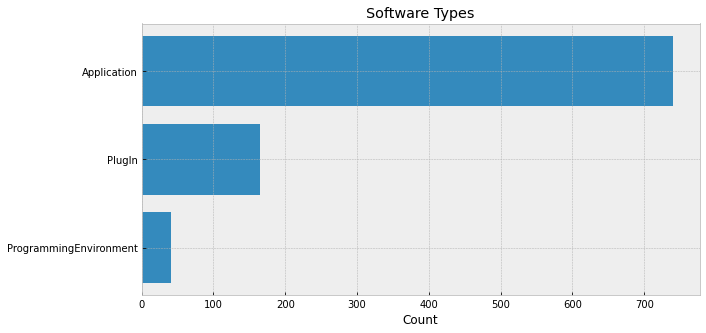

In [136]:
import matplotlib.pyplot as plt

# plot style
plt.style.use("bmh")

fig, ax = plt.subplots(figsize=(10, 5))

y = list(gkk2.values)
x = list(gkk2.keys())

ax.barh(x,y, align='center')

# labels
ax.set_title("Software Types")
ax.set_xlabel("Count")

ax.invert_yaxis()
plt.show()

#fig.savefig("Software Types.png", dpi = 130)

### SOFTWARE PURPOSES

In [137]:
gkk3 = PubMedPLoS_swName_Type_Purpose.Purpose.value_counts()
gkk3

Analysis          430
DataPreProcss     141
DataCollection    125
Modelling         110
Visualization      67
Programming        32
Stimulation        23
Simulation         18
Name: Purpose, dtype: int64

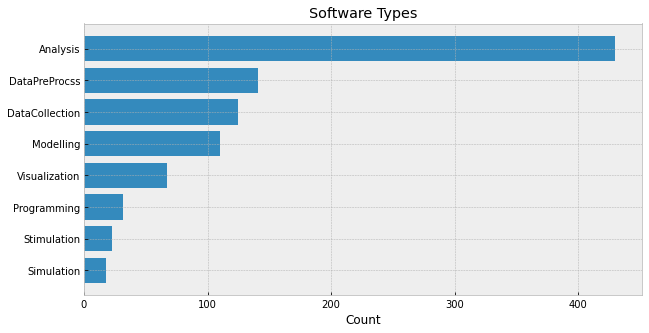

In [138]:
import matplotlib.pyplot as plt

# plot style
plt.style.use("bmh")

fig, ax = plt.subplots(figsize=(10, 5))

y = list(gkk3.values)
x = list(gkk3.keys())

ax.barh(x,y, align='center')

# labels
ax.set_title("Software Types")
ax.set_xlabel("Count")

ax.invert_yaxis()
plt.show()

#fig.savefig("Software Types.png", dpi = 130)